In [93]:
from pyforest import *

In [94]:
df=pd.read_csv("E:/Full Stack Data Scientist Bootcamp/datasets/kc_house_data.csv")


<IPython.core.display.Javascript object>

In [95]:
df.drop('id',inplace=True,axis=1)

In [96]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [97]:
df=df.drop(['date','waterfront','sqft_above','sqft_basement','zipcode','lat','long','sqft_living15','sqft_lot15'],axis=1)

In [98]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1955,0
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,1951,1991
2,180000.0,2,1.00,770,10000,1.0,0,3,6,1933,0
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1965,0
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1987,0
...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,3,8,2009,0
21609,400000.0,4,2.50,2310,5813,2.0,0,3,8,2014,0
21610,402101.0,2,0.75,1020,1350,2.0,0,3,7,2009,0
21611,400000.0,3,2.50,1600,2388,2.0,0,3,8,2004,0


In [99]:
df['age_house']=2023 - df['yr_built']

In [100]:
df['after_yr_renovated']=df['yr_renovated']-df['yr_built']

In [101]:
df['after_yr_renovated'].unique()

array([-1955,    40, -1933, -1965, -1987, -2001, -1995, -1963, -1960,
       -2003, -1942, -1927, -1977, -1900, -1979, -1994, -1916, -1921,
       -1969, -1947, -1968, -1985, -1941, -1915, -1909, -1948, -2005,
       -1929, -1981,    72, -1904, -1996, -2000, -1984, -2014, -1922,
       -1959, -1966, -1953, -1950, -2008, -1991, -1954, -1973, -1925,
       -1989, -1972, -1986, -1956, -2002, -1992, -1964, -1952, -1961,
       -2006, -1988, -1962, -1939,    45, -1967, -1975, -1980, -1910,
       -1983,    60, -1978, -1905, -1971,    99, -2010, -1945, -1924,
       -1990,    78, -1926, -2004, -1923, -2007,    97, -1976, -1949,
       -1999, -1901, -1993, -1920, -1997, -1943,    74,    34,    63,
         101, -1940, -1918, -1928, -1974, -1911, -1930, -1936, -1937,
          26,    49, -1908, -1931,    89, -1957, -1998, -1913, -2013,
          62,    51, -1907,   110, -1958,   102, -2012,    27,    38,
          22, -1912,    53,    85, -2011, -1917, -1946, -1951, -1932,
       -1944, -1982,

In [102]:
for i in range(0,len(df['after_yr_renovated'])):
    if df['after_yr_renovated'][i]<0:
        df['after_yr_renovated'][i]=0

C:\Users\Muhammad Talha Awan\AppData\Local\Temp\ipykernel_6404\1725417157.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['after_yr_renovated'][i]=0


In [103]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,yr_renovated,age_house,after_yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1955,0,68,0
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,1951,1991,72,40
2,180000.0,2,1.00,770,10000,1.0,0,3,6,1933,0,90,0
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1965,0,58,0
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1987,0,36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,3,8,2009,0,14,0
21609,400000.0,4,2.50,2310,5813,2.0,0,3,8,2014,0,9,0
21610,402101.0,2,0.75,1020,1350,2.0,0,3,7,2009,0,14,0
21611,400000.0,3,2.50,1600,2388,2.0,0,3,8,2004,0,19,0


In [104]:
df['after_yr_renovated'].unique()

array([  0,  40,  72,  45,  60,  99,  78,  97,  74,  34,  63, 101,  26,
        49,  89,  62,  51, 110, 102,  27,  38,  22,  53,  85,  31,  77,
        93,  18,  66,  21,  91,  75,  44,  28,  48,  46,  29,  58,  70,
        32,  56,  65,  47,  57,   9,  35,  82,  76,  61,  59,  87,  30,
        86, 108, 103,  79,  12,  37,  98,  16,  69,  94,  33,  43,  39,
        88,  71, 109, 114,  81,  84,  64, 104,  68,  90,  83,  41,  73,
        52,  36,  24, 105,  67,  15,  55,  42,  25,  17,   8,  50,  19,
        23,  54,  20,  80,  96, 100,  95,  92, 113,  11,   6,  14,  13,
       107,  10], dtype=int64)

In [105]:
df.tail()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,yr_renovated,age_house,after_yr_renovated
21608,360000.0,3,2.50,1530,1131,3.0,0,3,8,2009,0,14,0
21609,400000.0,4,2.50,2310,5813,2.0,0,3,8,2014,0,9,0
21610,402101.0,2,0.75,1020,1350,2.0,0,3,7,2009,0,14,0
21611,400000.0,3,2.50,1600,2388,2.0,0,3,8,2004,0,19,0
21612,325000.0,2,0.75,1020,1076,2.0,0,3,7,2008,0,15,0


In [106]:
df.drop('yr_renovated',axis=1,inplace=True)

In [107]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,age_house,after_yr_renovated
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.397293,0.036362,0.667434,0.054012,-0.054012,0.118124
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,0.079532,0.028472,0.356967,0.154178,-0.154178,0.019334
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.187737,-0.124982,0.664983,0.506019,-0.506019,0.049395
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.284611,-0.058753,0.762704,0.318049,-0.318049,0.045311
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.074710,-0.008958,0.113621,0.053080,-0.053080,-0.002829
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.029444,-0.263768,0.458183,0.489319,-0.489319,0.015068
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,1.000000,0.045990,0.251321,-0.053440,0.053440,0.084434
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.045990,1.000000,-0.144674,-0.361417,0.361417,-0.064873
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.251321,-0.144674,1.000000,0.446963,-0.446963,0.011751
yr_built,0.054012,0.154178,0.506019,0.318049,0.053080,0.489319,-0.053440,-0.361417,0.446963,1.000000,-1.000000,-0.255784


In [108]:
corr=df.corr()

In [109]:
len(corr.columns)

12

In [110]:
def get_heighly_corelated_column(df,trashhold):
    collrelated_col=set()
    corr_matrix=df.corr()
    for i in range(0,len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>trashhold:
                col=corr_matrix.columns[i]
                collrelated_col.add(col)
              
           
       
    return collrelated_col

In [111]:
corr.iloc[2,3]

0.7546652789673752

In [112]:
corr.columns[2]

'bathrooms'

In [113]:
get_heighly_corelated_column(df,0.76)

{'age_house', 'grade'}

In [114]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'yr_built', 'age_house',
       'after_yr_renovated'],
      dtype='object')

In [115]:
# sns.heatmap(df.corr(),annot=True)

In [116]:
# we can drop the hieglt co-relatted coloumn but here in am not doing

<IPython.core.display.Javascript object>

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

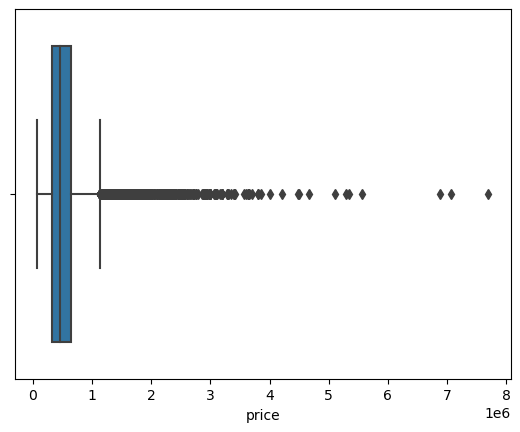

<IPython.core.display.Javascript object>

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

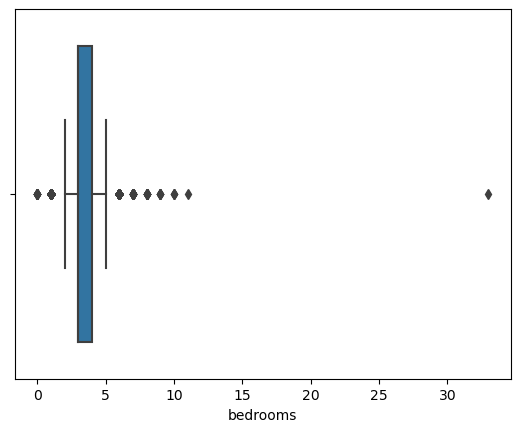

<IPython.core.display.Javascript object>

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

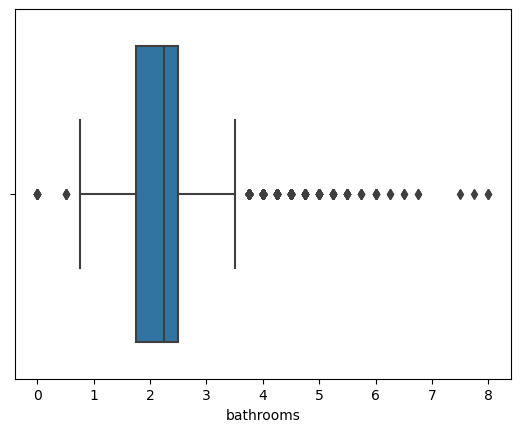

<IPython.core.display.Javascript object>

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

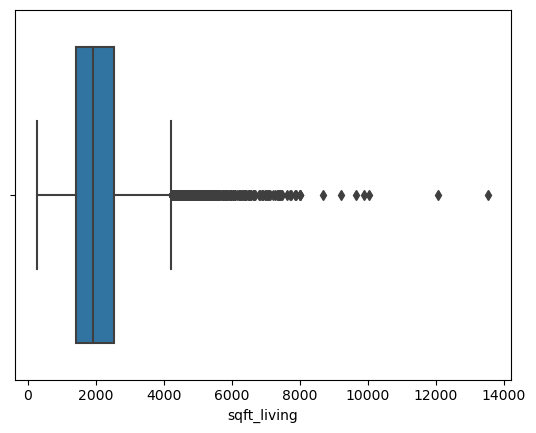

<IPython.core.display.Javascript object>

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

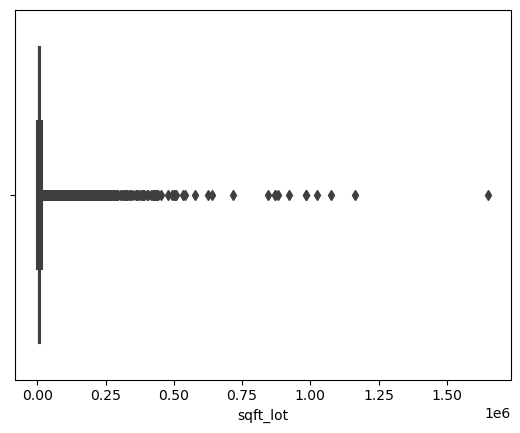

<IPython.core.display.Javascript object>

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

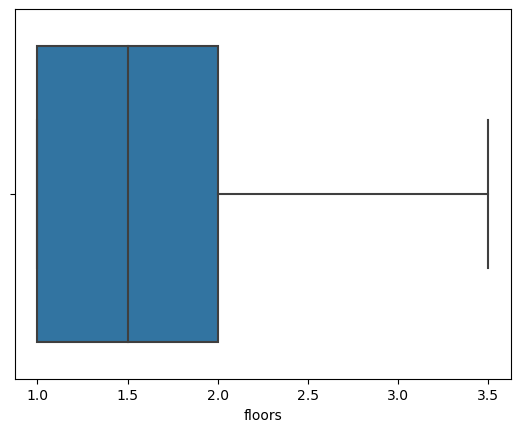

<IPython.core.display.Javascript object>

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

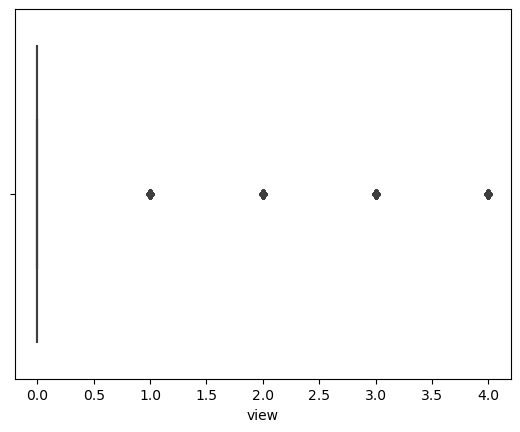

<IPython.core.display.Javascript object>

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

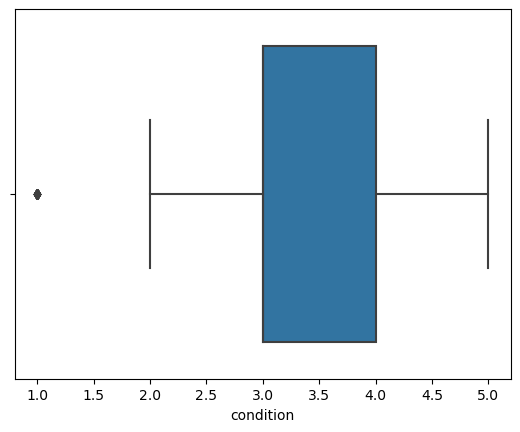

<IPython.core.display.Javascript object>

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

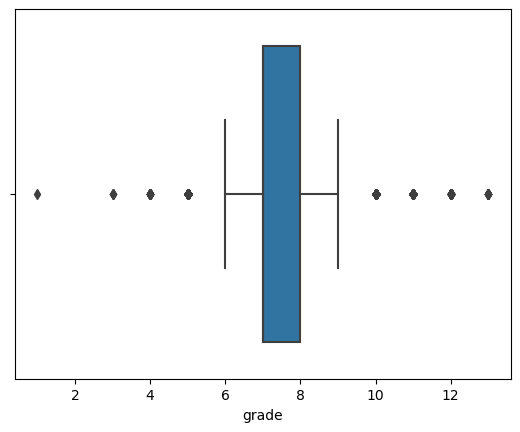

<IPython.core.display.Javascript object>

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

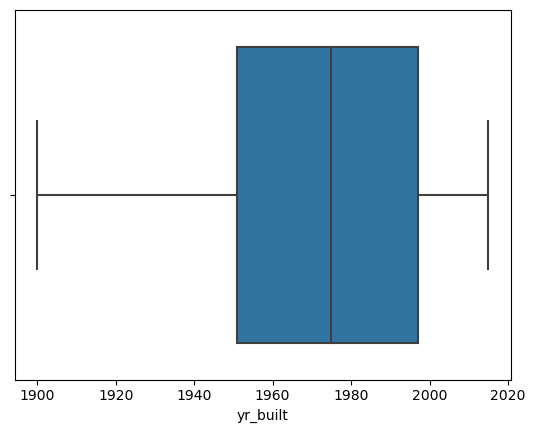

<IPython.core.display.Javascript object>

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

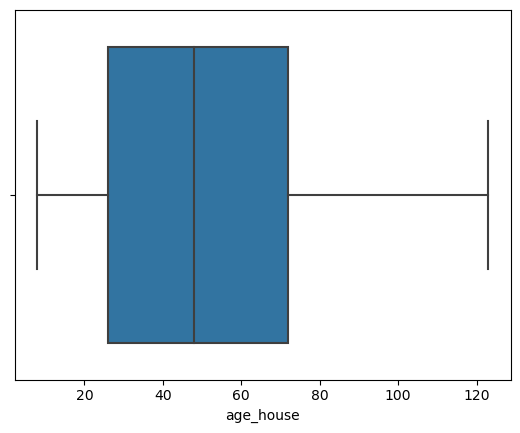

<IPython.core.display.Javascript object>

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

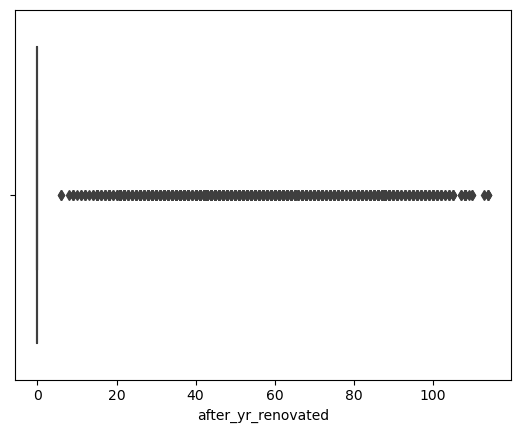

In [117]:
for i in df.describe().columns:
    sns.boxplot(df[i])
    plt.show()

In [118]:
# Dealing with the interquantilt range 
def find_outlier(df,col):
    
    global upper,lower
    
    first_qrt,third_qrt = np.percentile(df[col],25) , np.percentile(df[col],75)
    
    iqr= third_qrt - first_qrt
    
    cutoff=iqr*1.5
    
    lower ,upper =first_qrt-cutoff ,third_qrt+cutoff
    
    upper_outlier = df[df[col]>upper]
    lower_outlier = df[df[col]<lower]
    
    print("the upper outlier are : {}".format(upper_outlier.shape[0]))
    print("the lower outlier are : {}".format(lower_outlier.shape[0]))
    print("the total outlier are \n: {}".format(upper_outlier + lower_outlier))

    

In [119]:
out=find_outlier(df,'price')
out

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

the upper outlier are : 1146
the lower outlier are : 0
the total outlier are 
:        price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  \
5        NaN       NaN        NaN          NaN       NaN     NaN   NaN   
21       NaN       NaN        NaN          NaN       NaN     NaN   NaN   
49       NaN       NaN        NaN          NaN       NaN     NaN   NaN   
69       NaN       NaN        NaN          NaN       NaN     NaN   NaN   
125      NaN       NaN        NaN          NaN       NaN     NaN   NaN   
...      ...       ...        ...          ...       ...     ...   ...   
21568    NaN       NaN        NaN          NaN       NaN     NaN   NaN   
21576    NaN       NaN        NaN          NaN       NaN     NaN   NaN   
21590    NaN       NaN        NaN          NaN       NaN     NaN   NaN   
21597    NaN       NaN        NaN          NaN       NaN     NaN   NaN   
21600    NaN       NaN        NaN          NaN       NaN     NaN   NaN   

       condition  grade  yr_bui

In [120]:
print(out)

None


<IPython.core.display.Javascript object>

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1129575.0
-162625.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

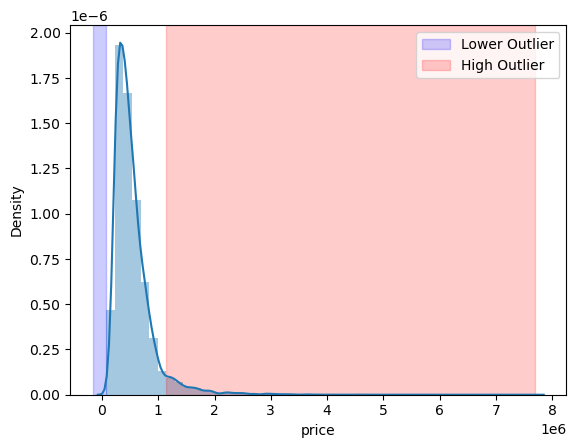

In [121]:
sns.distplot(df['price'] ,kde=True)
print(upper)
print(lower)
plt.axvspan(xmin=lower , xmax=df['price'].min(),alpha=0.2 ,color='blue' ,label='Lower Outlier')
plt.axvspan(xmin=upper , xmax=df['price'].max(),alpha=0.2 ,color='red' ,label='High Outlier')
plt.legend()


In [122]:
def find_outlier_from_zscore(df,col):
    global up ,low
    z=[]
    outliers=[]
    treshhold=3
    
    mean=np.mean(df[col])
    std=np.std(df[col])
    
    for i in df[col]:
        a=((i-mean)/std)
        
        if abs(a) > treshhold:
            z.append(abs(a))
            outliers.append(i)
           
    
    number_of_outlier=len(z)
    outlier_in_actual_dataset=outliers
    outlier_after_zscore=z
    
    return number_of_outlier, outlier_in_actual_dataset ,outlier_after_zscore


In [123]:
number_of_outlier, outlier_in_actual_dataset ,outlier_after_zscore = find_outlier_from_zscore(df,'price')

print("number_of_outlier {}".format(number_of_outlier))
print("\noutlier_in_actual_dataset {}\n".format(outlier_in_actual_dataset))
print("\n\n\n\noutlier_after_zscore {}".format(outlier_after_zscore))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

number_of_outlier 406

outlier_in_actual_dataset [2000000.0, 2250000.0, 2400000.0, 2900000.0, 2050000.0, 3075000.0, 2384000.0, 2250000.0, 2125000.0, 1950000.0, 3070000.0, 2250000.0, 2400000.0, 2450000.0, 1955000.0, 1750000.0, 5110800.0, 1875000.0, 2300000.0, 2260000.0, 5300000.0, 2200000.0, 1700000.0, 2537000.0, 5350000.0, 2250000.0, 1679000.0, 1928000.0, 2350000.0, 1715000.0, 2400000.0, 2532000.0, 3850000.0, 1735000.0, 1700000.0, 1650000.0, 1680000.0, 1760000.0, 2750000.0, 1810000.0, 3278000.0, 1700000.0, 1865000.0, 1650000.0, 4500000.0, 1835000.0, 3600000.0, 3000000.0, 2950000.0, 2525000.0, 1799000.0, 2298000.0, 2288000.0, 1899000.0, 1901000.0, 1900000.0, 1965000.0, 1675000.0, 2075000.0, 2544750.0, 2095000.0, 2453500.0, 2450000.0, 1905000.0, 1740000.0, 1650000.0, 2890000.0, 2200000.0, 2950000.0, 7062500.0, 2400000.0, 2500000.0, 2150000.0, 4000000.0, 2880500.0, 1875000.0, 2400000.0, 2125000.0, 2050000.0, 1705000.0, 5570000.0, 1670000.0, 2000000.0, 2485000.0, 1850000.0, 2479000.0, 2048

<IPython.core.display.Javascript object>

1129575.0
-162625.0


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

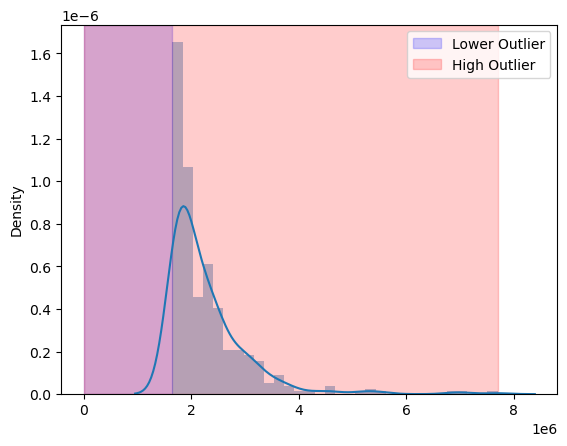

In [124]:
sns.distplot(outlier_in_actual_dataset, kde=True)
print(upper)
print(lower)
plt.axvspan(xmin=-3 , xmax=min(outlier_in_actual_dataset),alpha=0.2 ,color='blue' ,label='Lower Outlier')
plt.axvspan(xmin=3 , xmax=max(outlier_in_actual_dataset),alpha=0.2 ,color='red' ,label='High Outlier')
plt.legend()


In [125]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,age_house,after_yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1955,68,0
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,1951,72,40
2,180000.0,2,1.00,770,10000,1.0,0,3,6,1933,90,0
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1965,58,0
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1987,36,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,3,8,2009,14,0
21609,400000.0,4,2.50,2310,5813,2.0,0,3,8,2014,9,0
21610,402101.0,2,0.75,1020,1350,2.0,0,3,7,2009,14,0
21611,400000.0,3,2.50,1600,2388,2.0,0,3,8,2004,19,0


In [126]:
len(set(outlier_in_actual_dataset))

226

In [136]:
ol_df_li=[]
for i in df['price']:
    if i in set(outlier_in_actual_dataset):
        ol_df_li.append(0)
       
    else:
        ol_df_li.append(i)
        
df['P']=ol_df_li

df_after_removing_outlier=df.drop(df[df['P']==0].index)

In [137]:
df.shape

(21613, 13)

In [140]:
# df[df['P']==0]
df_after_removing_outlier

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,age_house,after_yr_renovated,P
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1955,68,0,221900.0
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,1951,72,40,538000.0
2,180000.0,2,1.00,770,10000,1.0,0,3,6,1933,90,0,180000.0
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1965,58,0,604000.0
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1987,36,0,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,3,8,2009,14,0,360000.0
21609,400000.0,4,2.50,2310,5813,2.0,0,3,8,2014,9,0,400000.0
21610,402101.0,2,0.75,1020,1350,2.0,0,3,7,2009,14,0,402101.0
21611,400000.0,3,2.50,1600,2388,2.0,0,3,8,2004,19,0,400000.0


<IPython.core.display.Javascript object>

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

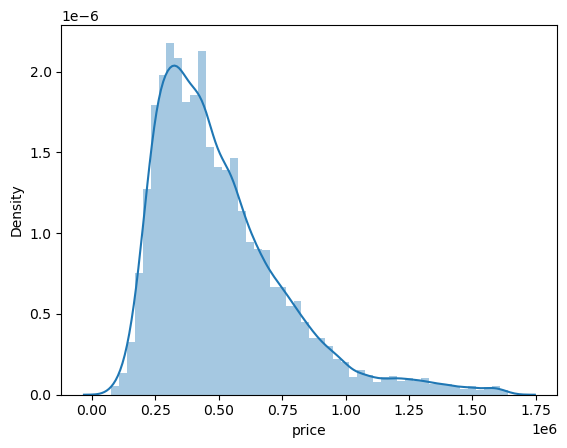

In [139]:
sns.distplot(after_removing_outlier['price'])

In [141]:
# Comparingthe new data and old data
from sklearn.ensemble import IsolationForest
Iso=IsolationForest()
ot=Iso.fit_predict(df)

In [142]:
ot

array([1, 1, 1, ..., 1, 1, 1])

In [143]:
len(ot)

21613

In [146]:
set(ot)

{-1, 1}

In [154]:
mask = outlier_in_actual_dataset  == -1
task = outlier_in_actual_dataset == 1

df_1=df[mask]
df_2=df[task]

KeyError: False

In [153]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,age_house,after_yr_renovated,P
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1955,68,0,221900.0
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,1951,72,40,538000.0
2,180000.0,2,1.00,770,10000,1.0,0,3,6,1933,90,0,180000.0
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1965,58,0,604000.0
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1987,36,0,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,3,8,2009,14,0,360000.0
21609,400000.0,4,2.50,2310,5813,2.0,0,3,8,2014,9,0,400000.0
21610,402101.0,2,0.75,1020,1350,2.0,0,3,7,2009,14,0,402101.0
21611,400000.0,3,2.50,1600,2388,2.0,0,3,8,2004,19,0,400000.0
